<a href="https://colab.research.google.com/github/BronsonSchultz/487_A6/blob/main/asn6_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bronson Schultz, 11231230, bcs269
## CMPT 487, A6, Q1

# Import Libraries 

Import all the required Tensorflow and Keras libraries

In [ ]:
# THIS VERSION IS FOR TENSORFLOW v2.0 which has keras embedded
# Note: Multibackend Keras is being discontinued after version 2.3.5.

# Library imports
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers 

import os as os
import numpy as np
import matplotlib.pyplot as plt

# Dataset sizes
num_train_images = 23000
num_validation_images = 2000
num_test_images = 399

# Model Hyperparameters
input_image_size = 64
batch_size = 32
num_training_epochs = 40
learning_rate = 0.001
l2_lambda = 0.01

# Parameters derived from hyperparameters
training_steps_per_epoch = int(num_train_images/batch_size)
validation_steps_per_epoch = int(num_validation_images/batch_size)
testing_steps_per_epoch = num_test_images/batch_size

%matplotlib inline

 # Step 1: Design the CNN architecture. After designing the architecture, print it in iPython Notebook. 


In [ ]:
# NETWORK ARCHITECTURE

# Initialize the CNN using the Sequential() function
model = Sequential([
                    # Add a convolution layer with 8 feature maps of shape (3,3), and input_shape=(64,64,3).
                    # Using 'relu' for the activation function.
                    Conv2D(filters=8, kernel_size=(3,3), activation="relu", input_shape=(64,64,3)),

                    # Add a max pooling layer, with a pool_size of (2,2)
                    MaxPooling2D(pool_size=(2,2)),

                    # Add three more pairs of convolution and max pooling layers.  Using 32, 64, and 128 feature maps, respectively,
                    # for each successive convolutional layer.  Use pool_size of (2,2) for every max pooling lyaer.
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),

                    # Add a flattening layer.
                    Flatten(),

                    # Add a fully connected layer with 128 units and the RELU activation function. This
                    # will be a hidden layer.  Use the L2 kernel regularizer with a lambda of l2_lambda (defined above).
                    Dense(128, activation='relu', kernel_regularizer='l2'),
                    
                    # Add a fully connected layer with 1 unit and the sigmoid activation function.  This
                    # will be the output layer.
                    Dense(1, activation='sigmoid')
])


# Create an Adam optimizer object with learning rate equal to learning_rate (defined above);
opt = Adam(learning_rate=learning_rate)


# Compile the CNN using the compile() method.  
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#Print a Summary of the Architecture using the summary() method.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         7

# Step 2: Load Images and Prepare the Network for training

In [ ]:
#Train and Test ImageDataGenerator code

# Create the ImageDataGenerator() for the training data.  
# We want to re-scale the image pixel data to the range 0.0 to 1.0 by dividing by 255.0.  
# Also, we want to use real-time data augmentation allowing horizontal flips, 
# and a modest amount of zooming and shearing. 
train_data_gen = image.ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)


# Create the ImageDataGenerator() for the validation data.  It doesn't need any data augmentation
valid_data_gen = image.ImageDataGenerator(rescale=1./255)


# Load the training set using train_datagen.flow_from_directory().
train_data = train_data_gen.flow_from_directory("train", target_size=(input_image_size,input_image_size), batch_size=batch_size, class_mode='binary')

# Load the validation dataset using validation_datagen.flow_from_directory(). 
valid_data = valid_data_gen.flow_from_directory("valid", target_size=(input_image_size, input_image_size), batch_size=batch_size, class_mode='binary')



Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Step 3: Train the CNN Network

In [ ]:
# Train the CNN using the fit() function of your CNN.
#
# training_steps_per_epoch defined above as num_training_images / batch_size.  Since each step will process
# batch_size images, this number of steps will run through the training set exactly once per eopch.  
# This calculation results in steps_per_epoch = num_training_images / batch_size = 718 batches to make one pass through the training set.
# This is, of course, done num_training_epochs times.
#
# Similarly, validation_steps_per_epoch is defined as num_validation_images / batch_size.  Again, this causes
# one validation pass to run through the validation set exactly once.  
# This calculation results in validation_steps = 2000/32 = 63 batches to make one pass through the validation set.

# You should see the loss function and the accuracy improving quite a bit after each of the 
# first few epochs.  Then it should slow down.  If you allow it to run for more than 40 epochs 
# you probably won't see much additional improvement (for me, after 55 epochs it was no better 
# than it was after 40 epochs).

# Expect a pause at the end of each epoch as it classifies images from the validation set.  The validation accuracy 
# should track the training accuracy fairly well.

# This will take a while - maybe 2-3 hours.  

history = model.fit(train_data,
                    steps_per_epoch=training_steps_per_epoch,
                    epochs=num_training_epochs,
                    validation_data=valid_data,
                    validation_steps=validation_steps_per_epoch,
                    verbose=1,
                    )



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 718 steps, validate for 62 steps
Epoch 1/40
718/718 [==============================] - 450s 626ms/step - loss: 0.7405 - accuracy: 0.6078 - val_loss: 0.6175 - val_accuracy: 0.6759
Epoch 2/40
718/718 [==============================] - 487s 678ms/step - loss: 0.5982 - accuracy: 0.6860 - val_loss: 0.5607 - val_accuracy: 0.7182
Epoch 3/40
718/718 [==============================] - 487s 678ms/step - loss: 0.5458 - accuracy: 0.7317 - val_loss: 0.5352 - val_accuracy: 0.7394
Epoch 4/40
718/718 [==============================] - 500s 697ms/step - loss: 0.5039 - accuracy: 0.7605 - val_loss: 0.5373 - val_accuracy: 0.7525
Epoch 5/40
718/718 [==============================] - 387s 539ms/step - loss: 0.4684 - accuracy: 0.7832 - val_loss: 0.4492 - val_accuracy: 0.7959
Epoch 6/40
718/718 [==============================] - 284s 395ms/step - loss: 0.4295 - accuracy: 0.8060 - val_loss: 0.4027 - val_accuracy: 0.8271
Epoch 7/40
718/718 [===========

# Step 4: Save the model and weights for prediction

In [ ]:
# Save the model using the save() method of the CNN model.

model.save('Cat-Dog-64x64-4layer-maxpooling.h5')
print("Saved model to disk")

Saved model to disk


# Step 5: Plot the training and Validation Loss/Accuracy

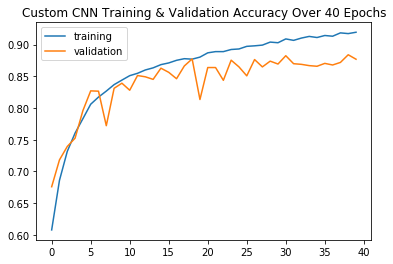

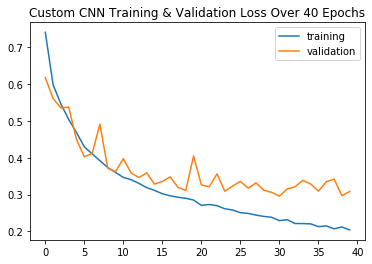

In [ ]:
# Use the history of the training and validation accuracy and loss 
# from the history object returned by model.fit_generator().
#
# e.g. history.history['accuracy'] is an array of the training accuracy for each epoch,
plt.title("Custom CNN Training & Validation Accuracy Over 40 Epochs")
plt.plot(history.history['accuracy'], label="training")
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

plt.title("Custom CNN Training & Validation Loss Over 40 Epochs")
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

## Interpreting the Graphs

Answer the following questions directly in this block (if you can't produce the graphs yourself, answer based on the sample outputs in the assignment PDF):

1. The graphs suggest there may be a problem with our network.  What is it?

In both graphs we can see the gap between the training metrics and the valididation metrics grow as we train past around the 10th epoch. Training accuracy keeps getting higher, and training loss keeps getting lower. But, validation accuracy and loss flatline (on average over the whole graph). This means that past that 10 epoch point, the model is overfitting to the training data.

2. What is it about the graphs that tells you that this is a problem?

As I stated above, the validation and training metrics start diverging as training time gets longer and longer. 
If we weren't overfitting, the validation accuracy/loss would stay close to the training accuracy/loss line. 
Overfitting is inevitable if we train for long enough, but we can only find that point by training past it.  



# Step 6: Predict Doc/Cat using the Trained Model

In [ ]:
# load the model from the disk
model = load_model('Cat-Dog-64x64-4layer-maxpooling.h5')


# create a data generator for our test set, rescaling the colour values between 0 and 1
test_datagen = image.ImageDataGenerator(rescale=1./255)

# pass each of our test images through the generator
generator = test_datagen.flow_from_directory("test1", target_size=(input_image_size, input_image_size), batch_size=batch_size, class_mode=None, shuffle=False)

# Now call model.predict() on the generator.

probabilities = model.predict(generator)

# take the 'probabilities' array, above, and convert to an array y_pred which is equal to 1 if 
# probabilities > .5, and 0 otherwise.  Also use np.squeeze() to remove the second dimension 
# of the array (which has length 1 and is not needed) so that y_pred has shape (499,), i.e. a 1-D array.  

y_pred = np.squeeze(probabilities > 0.5)


# Compare y_pred to generator.classes, which are the correct class labels, and compute and print out the classification accuracy.

accuracy = sum(y_pred == generator.classes) / len(y_pred)
print('The classification rate is', accuracy)
                                        

Found 399 images belonging to 2 classes.
The classification rate is 0.8696741854636592
